<a href="https://www.kaggle.com/code/dhanushnarayananr/ukraine-russia-2022-analysis?scriptVersionId=107188695" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')


#Reading the data through pandas
df = pd.read_csv('/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment.csv')
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,100.0,60.0,0,2,0,NaN,NaN,NaN,NaN,NaN
1,2022-02-26,3,27,26,146,706,49,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
2,2022-02-27,4,27,26,150,706,50,4,130.0,60.0,2,2,0,NaN,NaN,NaN,NaN,NaN
3,2022-02-28,5,29,29,150,816,74,21,291.0,60.0,3,2,5,NaN,NaN,NaN,NaN,NaN
4,2022-03-01,6,29,29,198,846,77,24,305.0,60.0,3,2,7,NaN,NaN,NaN,NaN,NaN


In [2]:
#checking for null data
df.isna().sum()

date                           0
day                            0
aircraft                       0
helicopter                     0
tank                           0
APC                            0
field artillery                0
MRL                            0
military auto                157
fuel tank                    157
drone                          0
naval ship                     0
anti-aircraft warfare          0
special equipment             19
mobile SRBM system           186
greatest losses direction     62
vehicles and fuel tanks       65
cruise missiles               65
dtype: int64

In [3]:
#filling null data by zero
df.fillna(0, inplace=True)
df['special equipment']= df['special equipment'].astype(int)
df['mobile SRBM system']= df['mobile SRBM system'].astype(int)
df['cruise missiles']= df['cruise missiles'].astype(int)
df['vehicles and fuel tanks']= df['vehicles and fuel tanks'].astype(int)

In [4]:
df.isna().sum()

date                         0
day                          0
aircraft                     0
helicopter                   0
tank                         0
APC                          0
field artillery              0
MRL                          0
military auto                0
fuel tank                    0
drone                        0
naval ship                   0
anti-aircraft warfare        0
special equipment            0
mobile SRBM system           0
greatest losses direction    0
vehicles and fuel tanks      0
cruise missiles              0
dtype: int64

In [5]:
i=0
while i<=64:
    df["vehicles and fuel tanks"][i]=df["military auto"][i]+df['fuel tank'][i]
    i+=1

df = df.drop(['military auto', 'fuel tank'], 1)

In [6]:
i=0
while i<=64:
    df["cruise missiles"][i]=df["mobile SRBM system"][i]+df['cruise missiles'][i]
    i+=1

df= df.drop("mobile SRBM system", 1)
df_subcopy=df.copy()
df

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,anti-aircraft warfare,special equipment,greatest losses direction,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,10,7,80,516,49,4,0,2,0,0,0,160,0
1,2022-02-26,3,27,26,146,706,49,4,2,2,0,0,0,190,0
2,2022-02-27,4,27,26,150,706,50,4,2,2,0,0,0,190,0
3,2022-02-28,5,29,29,150,816,74,21,3,2,5,0,0,351,0
4,2022-03-01,6,29,29,198,846,77,24,3,2,7,0,0,365,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,2022-09-30,219,264,225,2338,4932,1391,333,1003,15,176,131,Kramatorsk and Donetsk,3768,246
218,2022-10-01,220,264,226,2354,4949,1397,336,1009,15,176,131,Kramatorsk and Bakhmut,3786,246
219,2022-10-02,221,264,227,2377,4975,1405,337,1015,15,176,131,Kramatorsk and Bakhmut,3796,246
220,2022-10-03,222,265,228,2380,4991,1405,338,1026,15,176,131,Kramatorsk and Bakhmut,3811,246


In [7]:
#cumulative describe
#df.describe()
#today = date.today()
#yesterday= today - timedelta(days = 1)

needed_list=["aircraft","helicopter","tank","APC","field artillery","MRL","drone","naval ship","anti-aircraft warfare","special equipment","vehicles and fuel tanks","cruise missiles"]
print('\033[1m'"The Equipment Losses till ",df['date'].iloc[-1]," are listed Below :"'\033[0m')
Total_loss_of_equipment=0
for i in needed_list:
    Total_loss_of_equipment = Total_loss_of_equipment +df[i].max()
    print(i,'\033[1m',df[i].max(),'\033[0m')

print('\033[1m'"The total loss of equipments : ",Total_loss_of_equipment,'\033[0m')

The Equipment Losses till  2022-10-04  are listed Below :
aircraft  266 
helicopter  228 
tank  2424 
APC  5018 
field artillery  1407 
MRL  340 
drone  1028 
naval ship  15 
anti-aircraft warfare  177 
special equipment  131 
vehicles and fuel tanks  3823 
cruise missiles  246 
The total loss of equipments :  15103 


**Total Equipments possessed by Russia before the war brokeout**

*Total Military Equipments of Russia : Took from https://armedforces.eu/*

* Aircraft : 5552
* Helicopter : 1724
* Tank : 12270
* Artillery : 18497
* APC : 26831
* MRL : 4359
* NAVAL SHIP : 664
* Special Equip : 1070
* Drones: 2000


In [8]:
#changing the dataframe from cumulative to daily change
needed_list=["aircraft","helicopter","tank","APC","field artillery","MRL","drone","naval ship","anti-aircraft warfare","special equipment","vehicles and fuel tanks","cruise missiles"]
for (columnName, columnData)  in df.iteritems():
    if columnName in needed_list:
        i=0
        new_list=[]
        new_list.append(columnData[0])
        while i<len(columnData)-1:
            n=columnData[i+1]- columnData[i]
            new_list.append(n)
            i=i+1
        #print(new_list)
        
        # Drop that column
        df.drop(columnName, axis = 1, inplace = True)

        # Put whatever series you want in its place
        df[columnName] = new_list

In [9]:
#daily change head
df.head()

,date,day,greatest losses direction,aircraft,helicopter,tank,APC,field artillery,MRL,drone,naval ship,anti-aircraft warfare,special equipment,vehicles and fuel tanks,cruise missiles
0,2022-02-25,2,0,10,7,80,516,49,4,0,2,0,0,160,0
1,2022-02-26,3,0,17,19,66,190,0,0,2,0,0,0,30,0
2,2022-02-27,4,0,0,0,4,0,1,0,0,0,0,0,0,0
3,2022-02-28,5,0,2,3,0,110,24,17,1,0,5,0,161,0
4,2022-03-01,6,0,0,0,48,30,3,3,0,0,2,0,14,0


In [10]:
#today = date.today()
#yesterday= today - timedelta(days = 1)
needed_list=["aircraft","helicopter","tank","APC","field artillery","MRL","drone","naval ship","anti-aircraft warfare","special equipment","vehicles and fuel tanks","cruise missiles"]
print('\033[1m'"Equipment Loss today (",df['date'].iloc[-1],") : are listed below "'\033[0m')
for i in needed_list:
    print(i,'\033[1m',df[i].iloc[-1],'\033[0m')


Equipment Loss today ( 2022-10-04 ) : are listed below 
aircraft  1 
helicopter  0 
tank  44 
APC  27 
field artillery  2 
MRL  2 
drone  2 
naval ship  0 
anti-aircraft warfare  1 
special equipment  0 
vehicles and fuel tanks  12 
cruise missiles  0 


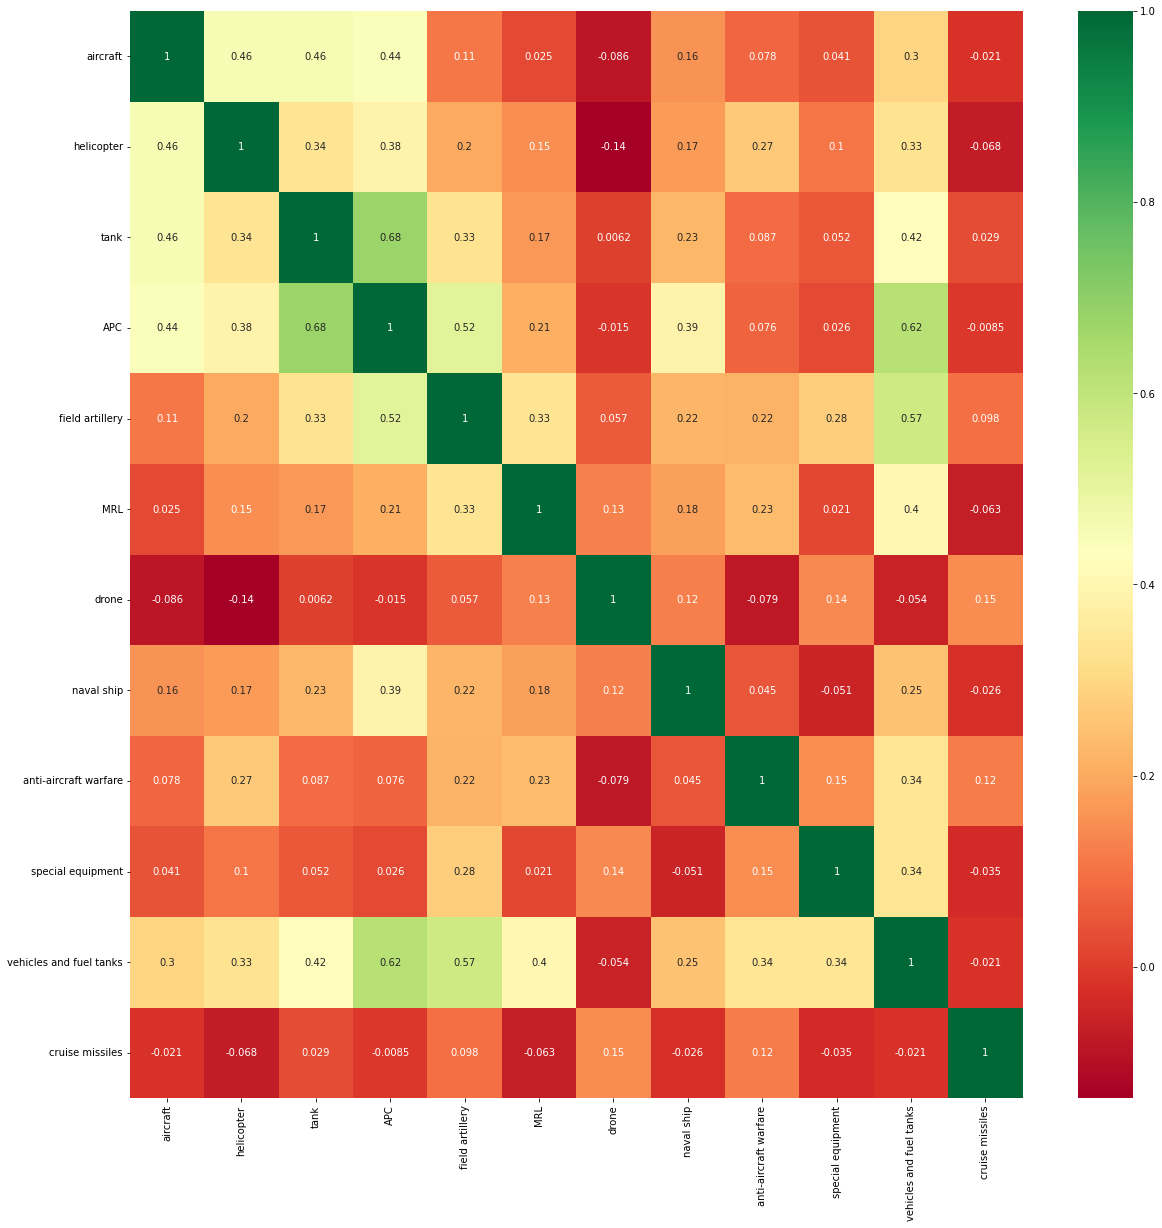

In [11]:
#correlation matrix for daily change
df_corr=df.drop('day',1)

correlation_mat = df_corr.corr() 
top_corr_features = correlation_mat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

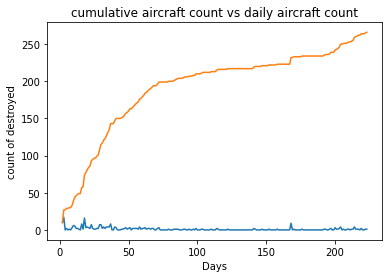

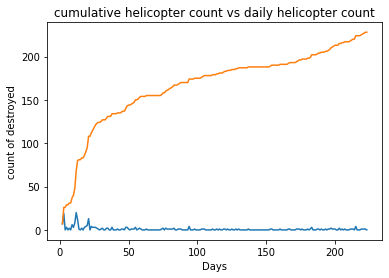

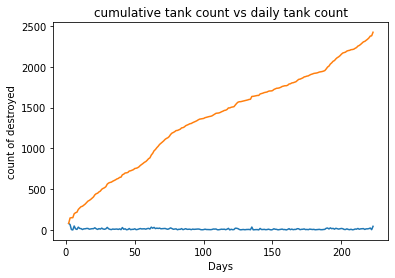

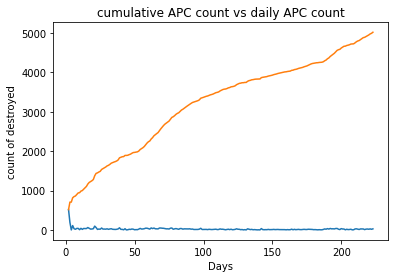

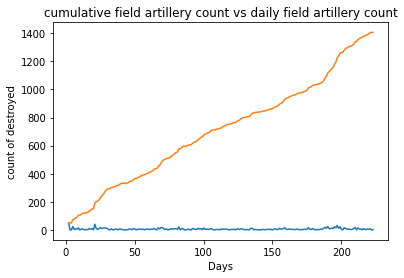

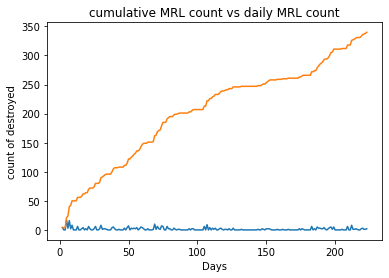

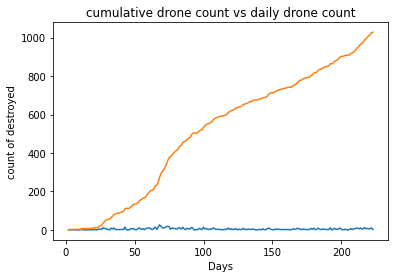

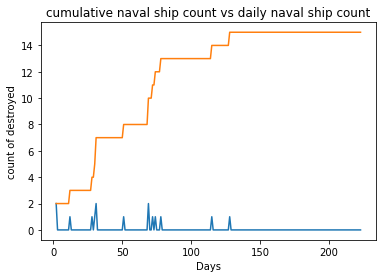

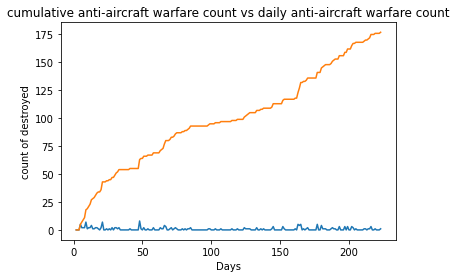

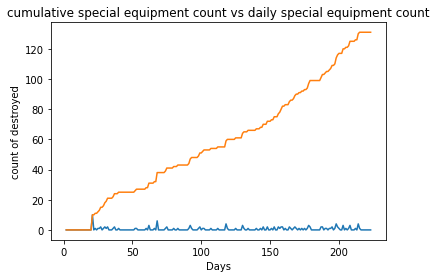

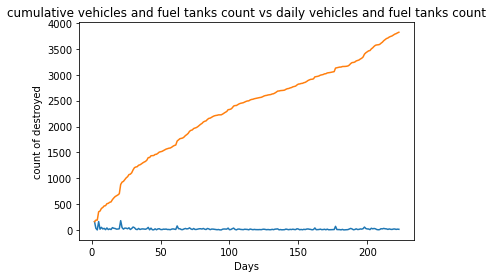

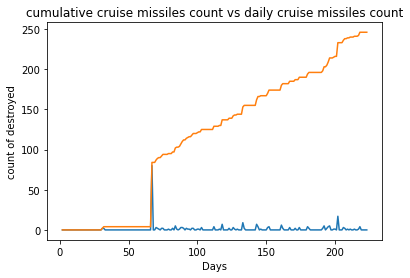

In [12]:
#Normal Plotting for day vs equipment under daily change
#needed_list=["aircraft","helicopter","tank","APC","field artillery","MRL","military auto","fuel tank","drone","naval ship","anti-aircraft warfare","special equipment","mobile SRBM system"]
#for (columnName_1, columnData_1)  in df.iteritems():
 #   for (columnName_2, columnData_2)  in df.iteritems():
  #      if columnName_1=="day" and columnName_2 in needed_list:
   #         plt.stem(columnData_1,columnData_2)
    #        plt.xlabel(columnName_1)
     #       plt.ylabel(columnName_2)
      #      plt.show()

#df1 = pd.read_csv('/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment.csv')
needed_list=["aircraft","helicopter","tank","APC","field artillery","MRL","drone","naval ship","anti-aircraft warfare","special equipment","vehicles and fuel tanks","cruise missiles"]
#Merged Plotting for both cumulative and daily change
for (columnName_1, columnData_1)  in df.iteritems():
    for (columnName_2, columnData_2)  in df.iteritems():
        if columnName_1=="day" and columnName_2 in needed_list:
            data=[df[columnName_1],df[columnName_2],df_subcopy[columnName_2]]
            headers=["day","daily_aircraft_count","cumulative aircraft count"]
            plot(pd.concat(data,axis=1,keys=headers).set_index('day'))
            plt.xlabel("Days")
            plt.ylabel("count of destroyed")
            plt.title("cumulative "+columnName_2+" count vs daily "+columnName_2+" count")
            plt.show()
            
#All Feature PairGrid Plot - Seaborn
#import seaborn as sns
#g = sns.PairGrid(df)
#g.map(sns.scatterplot)

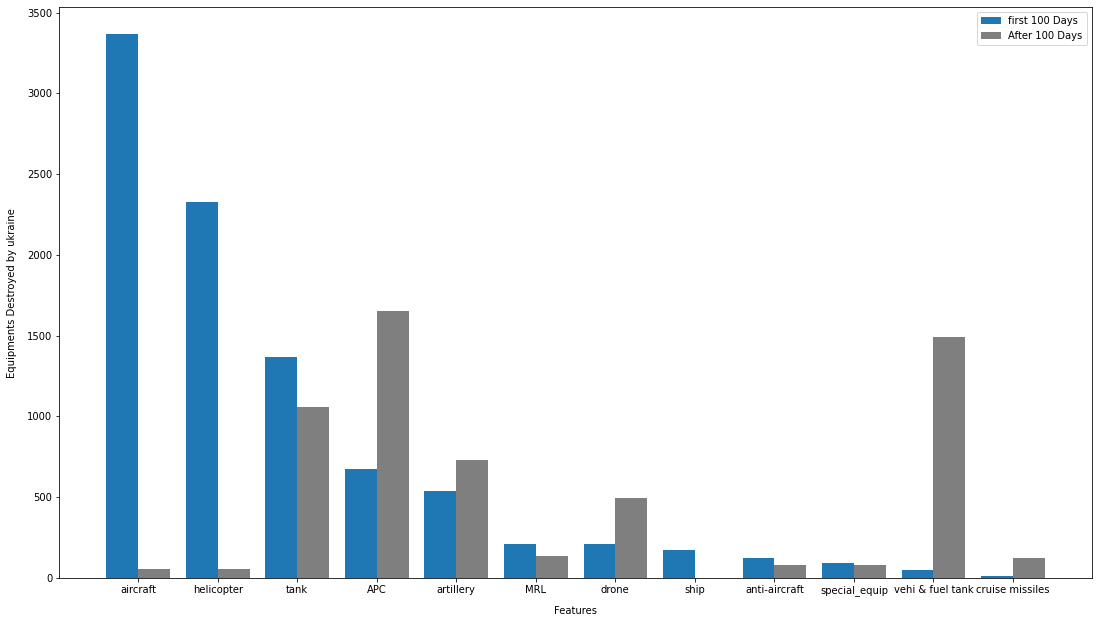

In [13]:
#First 25 days vs last remaining days  -  a bar to explore insights

#plt.barh(df.day[24],df.aircraft[:24].cumsum())
#plt.show()


bar1_main=[]
bar2_main=[]
for (columnName, columnData)  in df.iteritems():
    X_axis = np.arange(len(needed_list))
    if columnName in needed_list:
        bar1=columnData[:99].sum()
        bar2=columnData[99:].sum()
        bar1_main.append(bar1)
        bar2_main.append(bar2)

bar1_main.sort(reverse=True)
plt.bar(X_axis - 0.2, bar1_main , 0.4, label = 'first 100 Days', color="tab:blue")
plt.bar(X_axis + 0.2, bar2_main , 0.4, label = 'After 100 Days', color="tab:gray")
plot_name=["aircraft","helicopter","tank","APC","artillery","MRL","drone","ship","anti-aircraft","special_equip","vehi & fuel tank","cruise missiles"]
plt.xticks(X_axis, plot_name)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.legend()
plt.xlabel("Features",labelpad=10)
plt.ylabel("Equipments Destroyed by ukraine",labelpad=10)
plt.show()

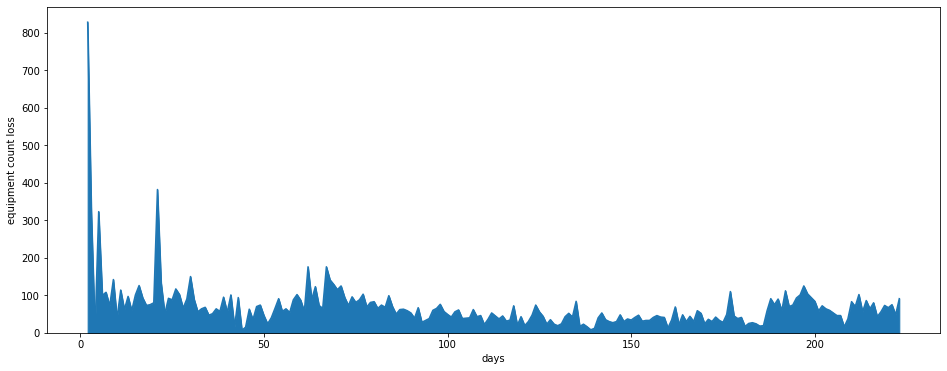

In [14]:
#Daily Total Loss of equipments
#new_df=pd.read_csv('/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment.csv')
total_loss_day_basis = df.copy()
total_loss_day_basis.drop(columns={'date'}, inplace=True)
total_loss_day_basis.set_index('day', inplace=True)
total_loss_day_basis['Daily equipment loss'] = pd.DataFrame(total_loss_day_basis.sum(axis=1))
total_loss_day_basis['Daily equipment loss'].plot(figsize=(16,6),kind="area")
plt.xlabel('days')
plt.ylabel('equipment count loss')
plt.show()

In [15]:
#Reading the data through pandas
df_personnel = pd.read_csv('/kaggle/input/2022-ukraine-russian-war/russia_losses_personnel.csv')
df_personnel.iloc[50:70]

,date,day,personnel,personnel*,POW
50,2022-04-16,52,20100,about,477.0
51,2022-04-17,53,20300,about,477.0
52,2022-04-18,54,20600,about,477.0
53,2022-04-19,55,20800,about,489.0
54,2022-04-20,56,20900,about,489.0
55,2022-04-21,57,21000,about,489.0
56,2022-04-22,58,21200,about,489.0
57,2022-04-23,59,21600,about,489.0
58,2022-04-24,60,21800,about,489.0
59,2022-04-25,61,21900,about,489.0


In [16]:
df_personnel.fillna(0, inplace=True)

In [17]:
df_personnel.describe()

,day,personnel,POW
count,222.000000,222.000000,222.000000
mean,112.500000,32774.126126,107.909910
std,64.230055,13911.722040,186.962747
min,2.000000,2800.000000,0.000000
25%,57.250000,21050.000000,0.000000
50%,112.500000,32850.000000,0.000000
75%,167.750000,42760.000000,200.000000
max,223.000000,60800.000000,496.000000


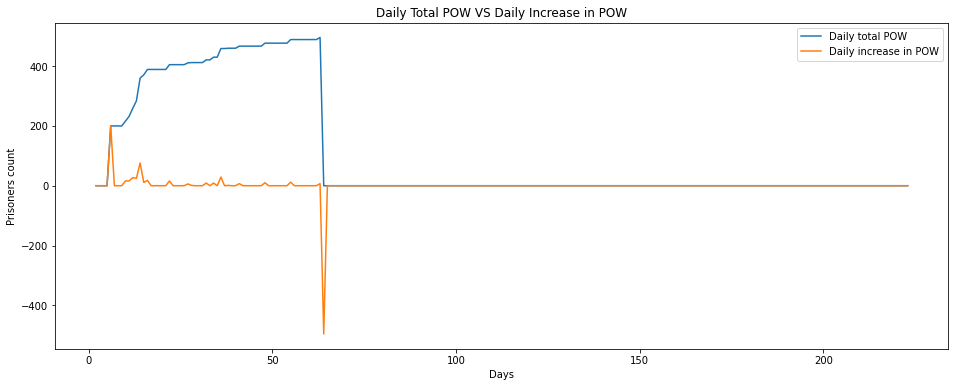

In [18]:
initial = 0
Data = []

for i in (df_personnel['POW'].values):
    value = i - initial
    Data.append(value)
    initial = i

df_personnel['Daily increase in POW'] = Data
df_personnel_structured = df_personnel[['day', 'POW', 'Daily increase in POW']].set_index('day')
df_personnel_structured.rename(columns={'POW':'Daily total POW'}, inplace=True)
#df_personnel_structured
df_personnel_structured.plot(figsize=(16,6))
plt.xlabel('Days')
plt.ylabel('Prisoners count')
plt.title("Daily Total POW VS Daily Increase in POW")
plt.show()
        

In [19]:
#df_personnel_structured.describe()

#today = date.today()
#yesterday= today - timedelta(days = 1)
yesterday_personnel_loss=df_personnel_structured["Daily increase in POW"].iloc[-1]
print('\033[1m'"Total Personnel Losses ",int(df_personnel['POW'].max()),'\033[0m')
print('\033[1m'"Personnel Loss Yesterday (",df_personnel['date'].iloc[-1],") : ",int(yesterday_personnel_loss),'\033[0m')

Total Personnel Losses  496 
Personnel Loss Yesterday ( 2022-10-04 ) :  0 


There is no personnel loss after day 62 till now. Only equipment losses are captured.